<a href="https://colab.research.google.com/github/SamanvithaBolem/SamanvithaBolem/blob/main/imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
customer = pd.read_csv('/content/customer.csv')
product = pd.read_csv('/content/product.csv')
product.sample()

,Product_ID,Product_name,Category,Price,Seller_City
17,118,Smartphone,Electronics,131154.1429,Kolkata


In [9]:
product.groupby(['Seller_City']).mean()

,Product_ID,Price
Seller_City,,
Bengalore,110.500000,88879.071430
Chennai,109.800000,55937.785724
Delhi,111.428571,73469.566346
Kolkata,111.000000,72955.345253
Mumbai,109.000000,57274.178587


In [10]:
print(customer.columns)
print(product.columns)


Index(['id', 'name', 'age', 'Product_ID', 'Purchased_Product', 'City'], dtype='object')
Index(['Product_ID', 'Product_name', 'Category', 'Price', 'Seller_City'], dtype='object')


In [13]:
merged_file = pd.merge(product,customer,
                       on='Product_ID')
print(merged_file.head())
print(merged_file.shape)

   Product_ID Product_name     Category  ...  age Purchased_Product     City
0         101        Watch      Fashion  ...   20             Watch   Mumbai
1         101        Watch      Fashion  ...   41        Smartphone    Delhi
2         102          Bag      Fashion  ...   40             Shoes  Chennai
3         103        Shoes      Fashion  ...   30             Shoes  Chennai
4         104   Smartphone  Electronics  ...   65        Smartphone    Delhi

[5 rows x 10 columns]
(15, 10)


In [14]:
outer_join = pd.merge(product,customer,
                       on='Product_ID',
                      how='outer')
print(outer_join.head())
print(outer_join.shape)

   Product_ID Product_name     Category  ...   age Purchased_Product     City
0         101        Watch      Fashion  ...  20.0             Watch   Mumbai
1         101        Watch      Fashion  ...  41.0        Smartphone    Delhi
2         102          Bag      Fashion  ...  40.0             Shoes  Chennai
3         103        Shoes      Fashion  ...  30.0             Shoes  Chennai
4         104   Smartphone  Electronics  ...  65.0        Smartphone    Delhi

[5 rows x 10 columns]
(29, 10)


In [15]:
left_join = pd.merge(product,customer,
                       on='Product_ID',
                     how = 'left')
print(left_join.head())
print(left_join.shape)

   Product_ID Product_name     Category  ...   age Purchased_Product     City
0         101        Watch      Fashion  ...  20.0             Watch   Mumbai
1         101        Watch      Fashion  ...  41.0        Smartphone    Delhi
2         102          Bag      Fashion  ...  40.0             Shoes  Chennai
3         103        Shoes      Fashion  ...  30.0             Shoes  Chennai
4         104   Smartphone  Electronics  ...  65.0        Smartphone    Delhi

[5 rows x 10 columns]
(25, 10)


In [18]:
right_join = pd.merge(product,customer,
                       on='Product_ID',
                      how = 'right')
print(right_join.head())
print(right_join.shape)

   Product_ID Product_name Category  ...  age Purchased_Product     City
0         101        Watch  Fashion  ...   20             Watch   Mumbai
1         101        Watch  Fashion  ...   41        Smartphone    Delhi
2           0          NaN      NaN  ...   25               NaN    Delhi
3           0          NaN      NaN  ...   10               NaN  Chennai
4           0          NaN      NaN  ...   35               NaN  Kolkata

[5 rows x 10 columns]
(19, 10)


In [19]:
merged_file.to_csv

outer_join.to_json

left_join.to_excel

right_join.to_html

<bound method DataFrame.to_html of     Product_ID Product_name     Category  ...  age Purchased_Product       City
0          101        Watch      Fashion  ...   20             Watch     Mumbai
1          101        Watch      Fashion  ...   41        Smartphone      Delhi
2            0          NaN          NaN  ...   25               NaN      Delhi
3            0          NaN          NaN  ...   10               NaN    Chennai
4            0          NaN          NaN  ...   35               NaN    Kolkata
5            0          NaN          NaN  ...   18               NaN      Delhi
6          106          Oil      Grocery  ...   15               Oil  Bangalore
7          106          Oil      Grocery  ...   44               NaN      Delhi
8          103        Shoes      Fashion  ...   30             Shoes    Chennai
9          104   Smartphone  Electronics  ...   65        Smartphone      Delhi
10         107       Laptop  Electronics  ...   23            Laptop     Mumbai
11   

In [21]:
merged_file['Product_name'].value_counts()

Watch         3
Books         3
Oil           2
Laptop        2
Shoes         2
Bag           2
Smartphone    1
Name: Product_name, dtype: int64

In [22]:
merged_file['City'].value_counts()

Mumbai       5
Delhi        4
Chennai      3
Bangalore    2
Kolkata      1
Name: City, dtype: int64

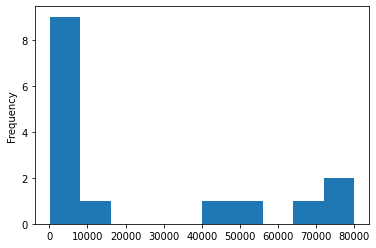

In [23]:
merged_file['Price'].plot.hist()

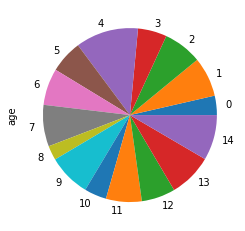

In [24]:
merged_file['age'].plot.pie()

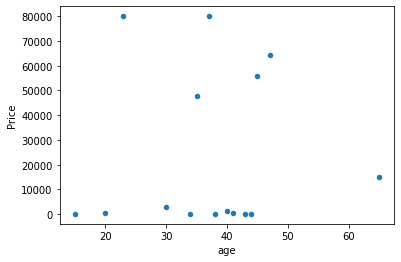

In [25]:
merged_file.plot.scatter(x='age',y='Price')

In [26]:
customer.isna().sum()

id                   0
name                 0
age                  0
Product_ID           0
Purchased_Product    8
City                 0
dtype: int64

In [32]:
product.isna().sum()

Product_ID      0
Product_name    0
Category        0
Price           0
Seller_City     0
dtype: int64

In [39]:
#Replacing Categorical variable which has missing value
#Dropping those recordswhich have missing value

print(customer.shape)

customer.dropna(axis=0,how='any',inplace=True)


(11, 6)


In [40]:
customer = pd.read_csv('/content/customer.csv')
print(customer.isna().sum())

id                   0
name                 0
age                  0
Product_ID           0
Purchased_Product    8
City                 0
dtype: int64


In [43]:
customer['Purchased_Product'].fillna(value='mode',
                                     inplace=True)   #Data imputation
customer.isna().sum()

id                   0
name                 0
age                  0
Product_ID           0
Purchased_Product    0
City                 0
dtype: int64

In [44]:
customer['Purchased_Product'].value_counts()
 

mode          8
Watch         3
Oil           2
Smartphone    2
Laptop        2
Shoes         2
Name: Purchased_Product, dtype: int64

In [46]:
employee = pd.read_csv('/content/employees.csv')
employee.isna().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [48]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [47]:
employee.sample()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
701,Robin,NaN,9/16/2005,1:26 AM,93201,11.712,True,Legal


In [50]:
nba = pd.read_csv('/content/nba.csv')
nba.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [51]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [53]:
nba.sample()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
187,Spencer Dinwiddie,Detroit Pistons,8.0,PG,23.0,6-6,200.0,Colorado,845059.0


In [58]:
nba['Salary'].mean()

4842684.105381166

In [62]:
nba['Salary_mean'] = nba['Salary'].fillna(value=nba['Salary'].mean(),
                                   inplace=True)

In [64]:
nba['Salary_mean'].mean()

nan

In [65]:
nba.sample()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Salary_mean
422,Cameron Payne,Oklahoma City Thunder,22.0,PG,21.0,6-3,185.0,Murray State,2021520.0,None


In [66]:
nba['Salary'].value_counts()

9.472760e+05    31
8.450590e+05    18
5.250930e+05    13
4.842684e+06    12
9.813480e+05     6
                ..
1.242720e+06     1
2.489530e+06     1
5.103120e+06     1
9.463484e+06     1
7.009020e+05     1
Name: Salary, Length: 310, dtype: int64